# Natural Language Processing

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
data=pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t",quoting=3)

In [12]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### 1.clean the all data

In [93]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
#first we clean one review

In [84]:
review=re.sub("[^a-zA-z]"," ",data.iloc[:,0][0])    # Remove the special characters
review

'Wow    Loved this place '

In [85]:
review=review.lower()                               # Convert the data into lowercase   
review

'wow    loved this place '

In [86]:
review=review.split()                               # Split all the data
review

['wow', 'loved', 'this', 'place']

In [87]:
review=[word for word in review if not word in set(stopwords.words("english"))]  
review                                              # Remove the irrelevant word

['wow', 'loved', 'place']

In [78]:
ps=PorterStemmer()

In [88]:
review=[ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
review                                              # Tack the square of the word

['wow', 'love', 'place']

In [89]:
review=" ".join(review)
review                                              # Jion the all words 

'wow love place'

In [90]:
# Now clean the all reviews

In [91]:
corpus=[]
for i in range(0,1000):
    review=re.sub("[^a-zA-z]"," ",data.iloc[:,0][i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in set(stopwords.words("english"))]
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    review=" ".join(review)
    corpus.append(review)

In [92]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

###  2.create the bag of models

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)

In [97]:
x=cv.fit_transform(corpus).toarray()

In [100]:
x                                                    # Create sparse matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [102]:
y=data["Liked"].values

###  3.build the machine learnign model

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [107]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [108]:
y_pred=nb.predict(x_test)

In [111]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[55, 42],
       [12, 91]])

In [112]:
146/200*100

73.0

# Sentiment Analysis

In [113]:
from textblob import TextBlob

In [130]:
x=data["Review"]

'Wow... Loved this place.'

In [136]:
values=[]
for i in range(len(x)):
    review=TextBlob(x[i])
    if review.sentiment.polarity >0:
        values.append(1)
    elif review.sentiment.polarity ==0:
        values.append(2)
    else:
        values.append(0)

In [162]:
y=pd.DataFrame(values)

,0
0,1
1,0
2,0
3,1
4,1
...,...
995,2
996,2
997,0
998,1


In [163]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(data["Liked"],y)
cm

array([[222, 120, 158],
       [ 28, 394,  78],
       [  0,   0,   0]])

In [144]:
x=pd.DataFrame(x)

In [145]:
x["Liked"]=y

In [149]:
x

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,2
996,Appetite instantly gone.,2
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",1


In [160]:
positive,negative,neutral=x["Liked"].value_counts()

/home/jackdaniel/ve/ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


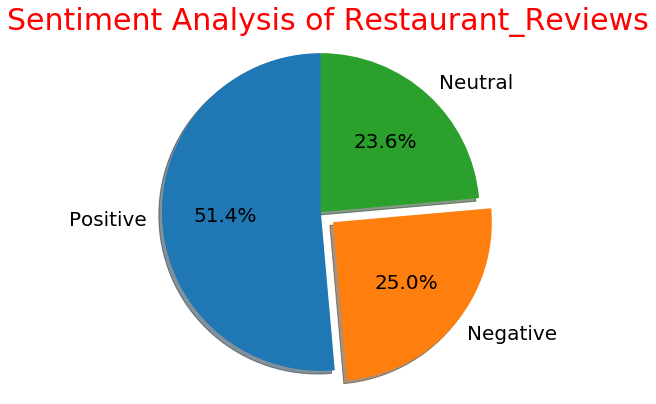

In [179]:
mpl.rcParams['font.size'] = 20
plt.rcParams["figure.figsize"]=(5,5)
labels = ["Positive","Negative","Neutral"]
sizes = [positive,negative,neutral]
explode = (0, 0.1, 0)  
fig=plt.figure()
ax1=ax1 = fig.add_axes([2, 0, 1, 1], aspect=1)
ax1.pie(sizes,labels=labels,explode=explode, autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Sentiment Analysis of Restaurant_Reviews', color='r',fontsize=30)
plt.show()

